In [ ]:
##################################################
#     PLOT DO SKEW T COM DADOS DO MODELO ERA
##################################################

In [ ]:
!pip install netCDF4  
!pip install metpy==1.0
#_------------GERAL-------------
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import pandas as pd
import xarray as xr 
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from numpy import linspace
from datetime import datetime
from metpy.units import units
import numpy as np
import scipy.ndimage as ndimage
from matplotlib.cm import get_cmap
import matplotlib.colors as colors
import ipywidgets as widgets # For ease in selecting variables.
#-----METPY---------------------
import metpy.calc as mpcalc
from metpy.plots import add_metpy_logo, Hodograph, SkewT
import matplotlib.gridspec as gridspec
import math 
import metpy as mt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from metpy.cbook import get_test_data
from metpy.interpolate import cross_section
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob, os


In [ ]:
# DADO
#Abrir arquivo 
file =xr.open_dataset ("/content/perfilvert1422utc.nc")
#file2 =xr.open_dataset ("/content/ERA_BRB.nc")
print(file)

<xarray.Dataset>
Dimensions:    (latitude: 281, level: 19, longitude: 261, time: 1)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -20.5 -20.25 -20.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -59.5 -59.75 -60.0
  * level      (level) int32 10 20 50 100 150 200 ... 700 750 800 850 925 1000
  * time       (time) datetime64[ns] 2016-07-14T22:00:00
Data variables:
    r          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-17 12:53:16 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...


In [ ]:
# Create slice variables subset domain
#Aeroporto de Foz do Iguaçu(Wyoming) : 
# Station latitude: -25.51
# Station longitude: -54.58  
lat_slice = -25
lon_slice = -55
level_slice = slice(1000, 10, 100)

# Get data, selecting time, level, lat/lon slice
data = file.sel(latitude=lat_slice,
                longitude=lon_slice,
                time='2016-07-14T22:00:00')

In [ ]:
print(data)

<xarray.Dataset>
Dimensions:    (level: 19)
Coordinates:
    longitude  float32 -55.0
    latitude   float32 -25.0
  * level      (level) int32 10 20 50 100 150 200 ... 700 750 800 850 925 1000
    time       datetime64[ns] 2016-07-14T22:00:00
Data variables:
    r          (level) float32 ...
    t          (level) float32 ...
    u          (level) float32 ...
    v          (level) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-17 12:53:16 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...


In [ ]:
df = data.to_dataframe()

In [ ]:
#Acompanhe o index de cada nível
df2=df.reset_index(level='level')
df3=df2.iloc[::-1]
df3

,level,longitude,latitude,time,r,t,u,v
18,1000,-55.0,-25.0,2016-07-14 22:00:00,58.064831,303.600006,0.687586,-2.334382
17,925,-55.0,-25.0,2016-07-14 22:00:00,39.994865,299.501282,7.338264,-10.509553
16,850,-55.0,-25.0,2016-07-14 22:00:00,54.942326,292.731384,10.850637,-13.748514
15,800,-55.0,-25.0,2016-07-14 22:00:00,68.697044,288.182068,14.182690,-13.676344
14,750,-55.0,-25.0,2016-07-14 22:00:00,84.028275,283.659760,17.668205,-12.364832
13,700,-55.0,-25.0,2016-07-14 22:00:00,82.360184,279.580872,19.747623,-9.428240
12,650,-55.0,-25.0,2016-07-14 22:00:00,44.375530,277.401733,18.015415,-3.798944
11,600,-55.0,-25.0,2016-07-14 22:00:00,10.248219,274.546692,14.529900,-1.060200
10,550,-55.0,-25.0,2016-07-14 22:00:00,13.641106,269.573822,18.963047,-4.116246
9,500,-55.0,-25.0,2016-07-14 22:00:00,10.191525,263.582550,24.292030,-4.536825


In [ ]:
#Variáveis 

T =  df3['t'][:]
ur = df3['r'][:]
p = df3['level'].values * units.hPa 
df3['Td'] = T-((100-ur)/5)-273.15
Td = df3['Td']
df3['tc']  = T-273.15 
tc = df3['tc'] 
u = df3['u']
v = df3['v']
df3.to_csv('sondagemfoz22as22utc.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#configurar no excel os dígitos 
sond=pd.read_csv('/content/sondagemfoz22as22utc.csv',sep=';',header=0)
sond

,level,longitude,latitude,time,r,t,u,v,Td,tc
0,1000,-55,-25,14/07/2016 22:00,58.064830,303.60000,0.687586,-2.334382,22.062988,30.450012
1,925,-55,-25,14/07/2016 22:00,39.994865,299.50128,7.338265,-10.509553,14.350250,26.351288
2,850,-55,-25,14/07/2016 22:00,54.942326,292.73138,10.850637,-13.748514,10.569855,19.581390
3,800,-55,-25,14/07/2016 22:00,68.697044,288.18207,14.182690,-13.676344,8.771484,15.032074
4,750,-55,-25,14/07/2016 22:00,84.028275,283.65976,17.668205,-12.364832,7.315430,10.509766
5,700,-55,-25,14/07/2016 22:00,82.360180,279.58087,19.747623,-9.428240,2.902924,6.430878
6,650,-55,-25,14/07/2016 22:00,44.375530,277.40173,18.015415,-3.798945,-6.873169,4.251740
7,600,-55,-25,14/07/2016 22:00,10.248219,274.54670,14.529900,-1.060200,-16.553650,1.396698
8,550,-55,-25,14/07/2016 22:00,13.641106,269.57382,18.963047,-4.116246,-20.847946,-3.576172
9,500,-55,-25,14/07/2016 22:00,10.191524,263.58255,24.292030,-4.536825,-27.529144,-9.567444


In [ ]:
T =  sond['t'][:]
ur = sond['r'][:]
p = sond['level'].values * units.hPa 
sond['Td'] = T-((100-ur)/5)-273.15
Td = sond['Td'].values * units.degC
sond['tc']  = (T-273.15 ).values * units.degC
tc = sond['tc'].values * units.degC 
u = sond['u'].values * units('meters/second')
v = sond['v'].values * units('meters/second')

In [ ]:
# Calculate the LCL -- ERRO fazer na mão
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], tc[0], Td[0])

# Calculate the parcel profile
parcel_prof = mpcalc.parcel_profile(p, tc[0], Td[0]).to('degC')

print('NCL:  ', lcl_pressure)
print( 'T no  NCL:  ',lcl_temperature)

NCL:   885.5221065107645 hectopascal
T no  NCL:   20.085052665203904 degree_Celsius


In [ ]:
# PLOT WITH ZOOMED DOMAIN
DPI = 300
file_out ='teste.png'

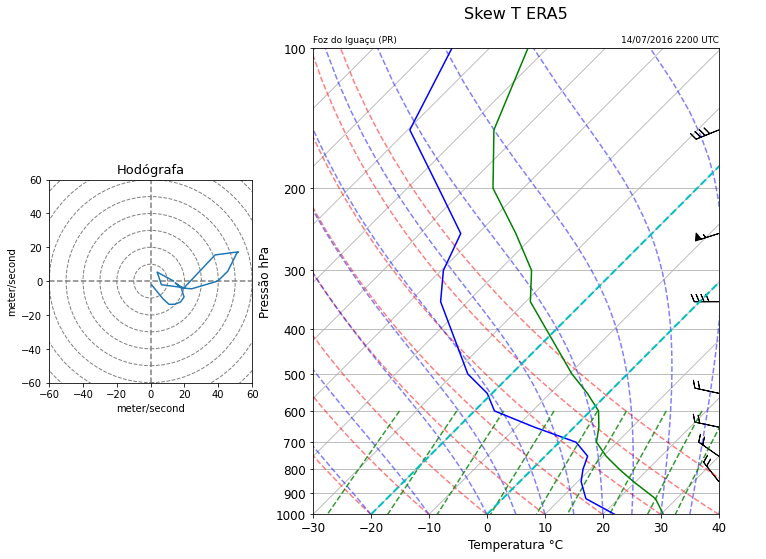

In [ ]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(12, 15))

# Grid for plots
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[4, 1])
#gs = gridspec.GridSpec(3, 3)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
#ax2 = plt.subplot(gs[1])
skew = SkewT(fig, rotation=45, subplot=gs[1])
skew.plot(p, tc, 'g')
skew.plot(p, Td, 'b')
skew.plot_barbs(p[::2], u[::2], v[::2],length=7,fill_empty=False,sizes=dict(emptybarb=0., spacing=0.2, height=0.3))
skew.ax.set_ylim(1000, 100)

# Set some titles
plt.title('Skew T ERA5', loc='center', fontsize=16,y=1.05)
plt.title('Foz do Iguaçu (PR)', loc='left', fontsize=9)
plt.title('14/07/2016 2200 UTC', loc='right', fontsize=9)

 
plt.xlabel('Temperatura °C', fontsize=12 )
plt.ylabel('Pressão hPa',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Good bounds for aspect ratio
skew.ax.set_xlim(-30, 40)

#----------CINE E CAPE---------------
# Plot LCL as black dot
#skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Plot the parcel profile as a black line
#skew.plot(p, parcel_prof, 'k', linewidth=2)

# Shade areas of CAPE and CIN
#skew.shade_cin(p, T, parcel_prof, Td)
#skew.shade_cape(p, T, parcel_prof)

# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)
skew.ax.axvline(-20, color='c', linestyle='--', linewidth=2)

#----- Create a hodograph--------------
#ax3 = plt.subplot(gs[2])
ax = plt.subplot(gs[0])
h = Hodograph(ax, component_range=60.)
h.add_grid(increment=10)
h.plot(u, v, linewidth=1.5)
plt.title('Hodógrafa', loc='center', fontsize=13)

#------ Barbelas --------#
# Draw the wind barbs axis and everything that comes with it.
#ax1 = plt.subplot(gs[0])

# EXPORT RESULT
plt.savefig(file_out, dpi=DPI, bbox_inches='tight', pad_inches=0)
os.system('open -a Preview teste.png')
plt.show()